In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone
from simbad_download import resolve_name

Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# CMD diagram

In [2]:
CLUSTER_NAME: str = 'Berkeley 36'

In [3]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [4]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [5]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')
lit: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

## Total mass

In [6]:
lit.link_bibcode.unique()

array(['2018A&A...618A..93C'], dtype=object)

In [7]:
found.head()

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences
0,1,3032946994949204352,3,NaN,1636148068921376768,Gaia DR3 3032946994949204352,3032946994949204352,1357554882,2016.0,109.142863,...,1.891014,1.186862,0.702205,0.453065,1.128120,0.007250,2.474931,0.530580,0.076353,0.64
1,2,3032947132388166272,3,NaN,1636148068921376768,Gaia DR3 3032947132388166272,3032947132388166272,878916124,2016.0,109.102426,...,1.487814,0.933801,0.552482,0.356463,1.355954,0.002536,1.569848,0.257870,0.064825,0.65
2,3,3032947647784229120,3,NaN,1636148068921376768,Gaia DR3 3032947647784229120,3032947647784229120,1328783251,2016.0,109.117799,...,2.043341,1.282468,0.758770,0.489561,1.137227,0.002125,-0.001620,0.334131,0.086462,0.96
3,4,3032950671441200384,3,NaN,1636148068921376768,Gaia DR3 3032950671441200384,3032950671441200384,1680774857,2016.0,109.100294,...,1.955667,1.227440,0.726214,0.468555,1.076241,0.001378,0.193948,0.288111,0.077322,1.00
4,7,3032950877599632128,3,NaN,1636148068921376768,Gaia DR3 3032950877599632128,3032950877599632128,1530092246,2016.0,109.092328,...,1.551961,0.974062,0.576302,0.371832,1.302727,0.002073,1.557292,0.243476,0.065876,0.65


In [8]:
not_found = pd.merge(not_found, lit[['EDR3 id', 'link_bibcode']], on='EDR3 id')

In [9]:
not_found[not_found.occurences==0.0]['link_bibcode'].value_counts()

Series([], Name: link_bibcode, dtype: int64)

In [10]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

In [11]:
found.occurences.value_counts()

0.87    3
0.90    3
1.00    3
0.94    3
0.99    3
0.84    2
0.93    2
0.41    2
0.65    2
0.85    2
0.35    2
0.78    1
0.80    1
0.64    1
0.92    1
0.31    1
0.59    1
0.46    1
0.26    1
0.74    1
0.62    1
0.95    1
0.91    1
0.40    1
0.76    1
0.79    1
0.29    1
0.47    1
0.96    1
0.16    1
Name: occurences, dtype: int64

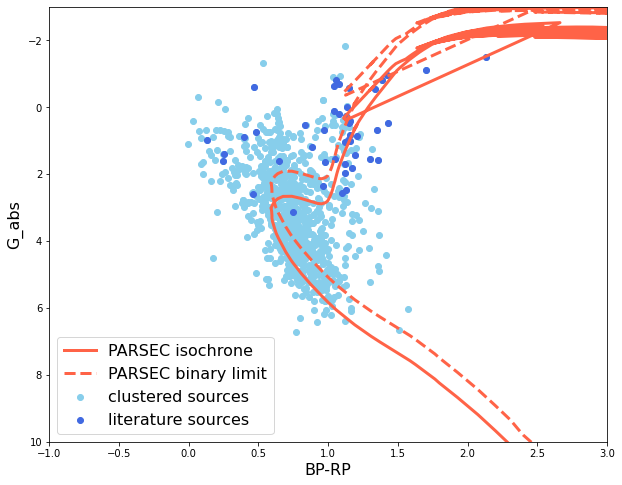

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

# Not found?

In [13]:
print(f'{len(not_found[not_found.occurences==0.0])} literature sources were not clustered.')

0 literature sources were not clustered.


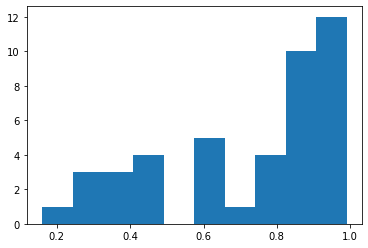

In [14]:
plt.hist(not_found.occurences);

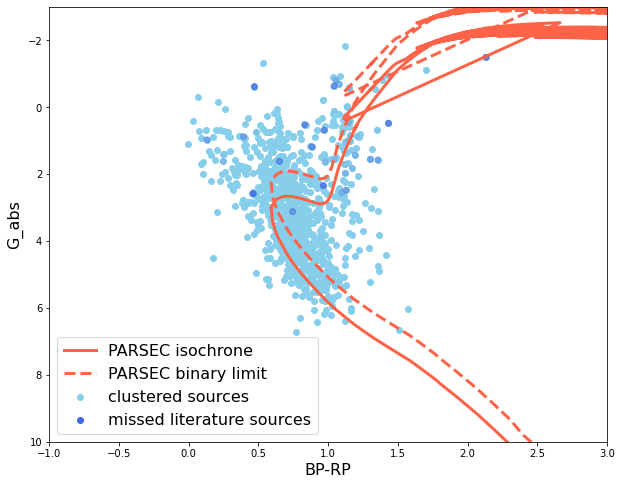

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(not_found['BP-RP'], not_found['G_abs'], color='royalblue',
            label='missed literature sources', alpha=1-not_found['occurences'])
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [16]:
def found_vs_not_found_hist(found: pd.DataFrame,
                            not_found: pd.DataFrame,
                            prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', alpha=0.5, label='Found literature sources', density=True, bins=50)
    plt.hist(not_found[prop], color='tomato', alpha=0.5, label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);

In [17]:
def found_vs_not_found_hist_xlines(found: pd.DataFrame,
                                   not_found_values: list,
                                   prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', label='Found literature sources', density=True, bins=20)
    for val in not_found_values:
        plt.axvline(x=val, linestyle='--', color='black', linewidth=2)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16)

In [18]:
def not_found_hist(not_found: pd.DataFrame,
                   prop: str,
                   threshold: float = None):
    plt.figure(figsize=(8, 5))
    plt.hist(not_found[prop], color='tomato', label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);
    if threshold:
        plt.axvline(x=threshold, linestyle='--', color='black', linewidth=2)

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


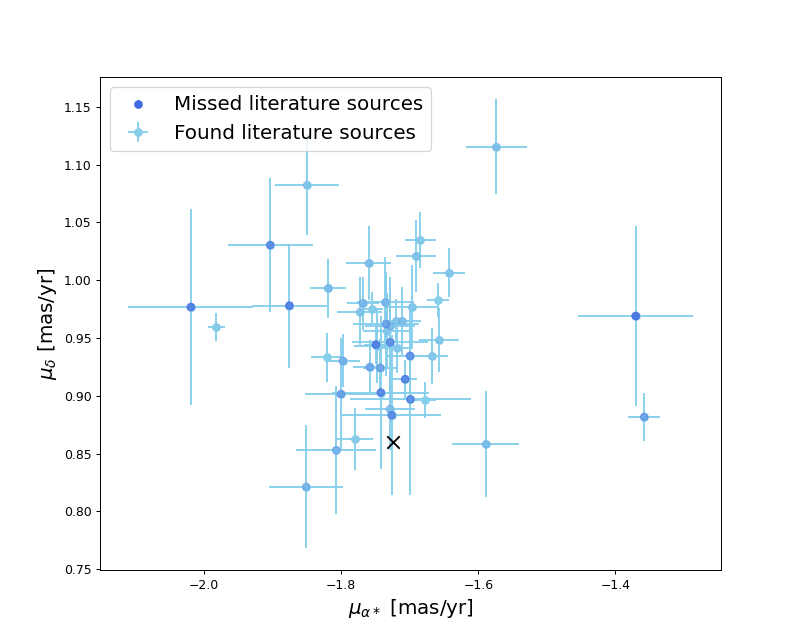

In [20]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=0,
             label='Found literature sources')
plt.scatter(not_found.pmra, not_found.pmdec, alpha=1-not_found.occurences, color='royalblue', zorder=1,
             label='Missed literature sources')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=2)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [21]:
tot_not_found = not_found[not_found.occurences==0]
PMRA_STD = np.std(np.abs(found.pmra-cp_pmra))
PMDEC_STD = np.std(np.abs(found.pmdec-cp_pmdec))

correct_pm_mask = (np.abs(tot_not_found.pmra-cp_pmra)<=6*PMRA_STD) & (np.abs(tot_not_found.pmdec-cp_pmdec)<=6*PMDEC_STD)
len(tot_not_found[correct_pm_mask])
correct_pm = tot_not_found[correct_pm_mask]

In [22]:
correct_pm

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences,link_bibcode


<IPython.core.display.Javascript object>


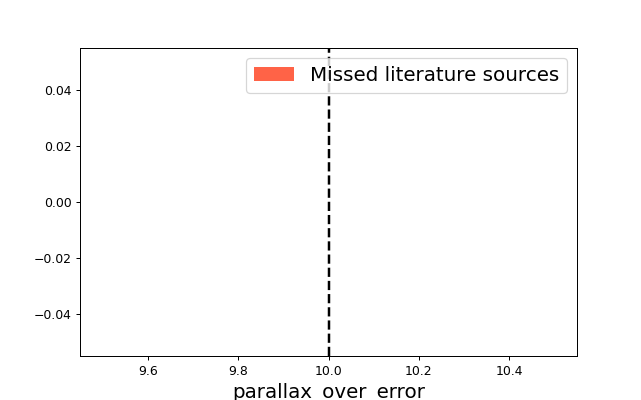

/home/maya/miniconda3/envs/astronomy/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [23]:
not_found_hist(tot_not_found, 'parallax_over_error', 10.0);

<IPython.core.display.Javascript object>


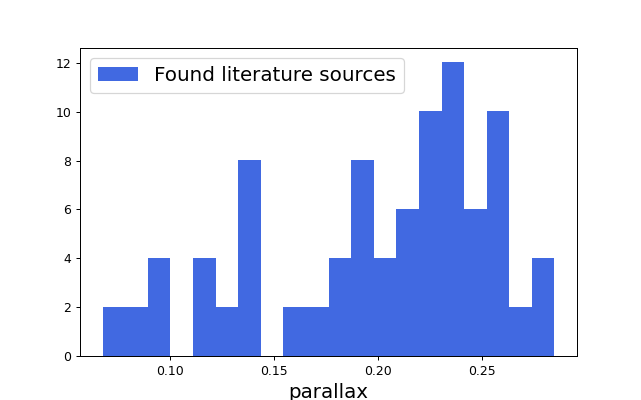

In [24]:
found_vs_not_found_hist_xlines(found, tot_not_found.parallax.values, 'parallax')

<IPython.core.display.Javascript object>


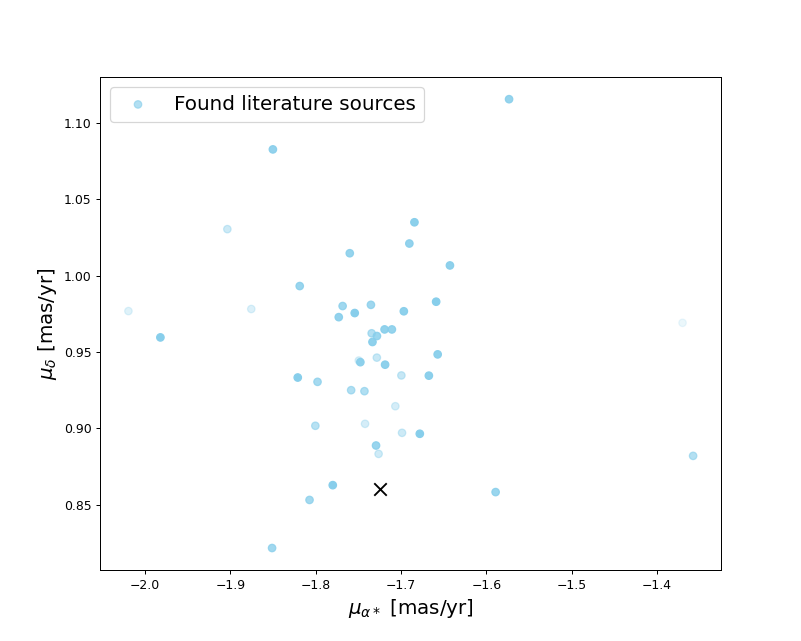

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(found.pmra, found.pmdec, color='skyblue', zorder=1, alpha=found.occurences,
             label='Found literature sources')

plt.errorbar(tot_not_found[correct_pm_mask].pmra, tot_not_found[correct_pm_mask].pmdec, fmt='o',
             xerr=tot_not_found[correct_pm_mask].pmra_error, yerr=tot_not_found[correct_pm_mask].pmdec_error,
             color='black')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=3)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

<IPython.core.display.Javascript object>


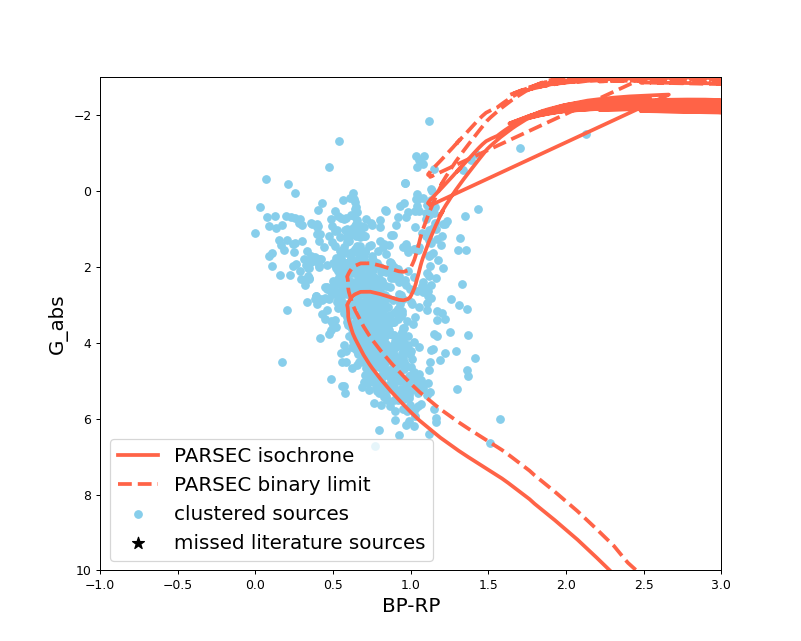

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue',
            label='clustered sources');
plt.scatter(tot_not_found[correct_pm_mask]['BP-RP'], tot_not_found[correct_pm_mask]['G_abs'], color='black',
            label='missed literature sources', zorder=3, marker='*', s=100)
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato',
         linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato',
         linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);